In [14]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# libraries to import and clean texts
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     F:\ProgramData\Anaconda3\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     F:\ProgramData\Anaconda3\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     F:\ProgramData\Anaconda3\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Importing the dataset
# by putiing quoting 3 we are ignoring the quotes in the docs
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


Now we visulaize the words that contribute to negative and positive review. 
To achieve that we will divide the words into negative and positive words

In [4]:
#splitting the dataset to positive and negative
positiveReviews = dataset[dataset.Liked == 1]
negativeReviews = dataset[dataset.Liked == 0]

We will focus on generating the word cloud for positive words

In [5]:
positiveReviews.Review

0                               Wow... Loved this place.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
8                              The fries were great too.
9                                         A great touch.
10                              Service was very prompt.
13     I tried the Cape Cod ravoli, chicken, with cra...
16                                   Highly recommended.
21                                    The food, amazing.
22                                 Service is also cute.
23     I could care less... The interior is just beau...
24                                    So they performed.
25     That's right....the red velvet cake.....ohhh t...
27     This hole in the wall has great Mexican street...
30     Also there are combos like a burger, fries, an...
32     I found this place by accident and I could not...
34                     Overall, I like this place a lot.
35     The only redeeming quali

Now we need to remove stopwords such as "the, these," etc so that no weightage is given for these words while building the model. 

In [6]:
#lets see the stopwords in nltk
w=stopwords.words('english')
print (w)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Most of these words are not needed but negative words such as mightn'nt , needn't etc is much needed in our case.

In [7]:
neededWords = ['mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",'don', "don't", 'should', "should've", 'no', 'nor', 'not'] 

So now we will assign the nltk stopwords to a variable let say buitinstopwords and delete the needed words from the same

In [8]:
builtinstopwords = stopwords.words('english')


In [9]:
for word in neededWords:
    if word in builtinstopwords: 
        builtinstopwords.remove(word)
print (builtinstopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

In [10]:
builtinstopwords.extend(["food", "place"])
print (builtinstopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

In [11]:
#assigning the positive words to a single variable after cleaning
positive_words = ''
for sentence in positiveReviews.Review:
    temptext = re.sub('[^a-zA-Z]', ' ', sentence) #deleting all unwanted words
    temptext = temptext.lower() #converting the texts to lowercase
    tokens = nltk.word_tokenize(temptext) #tokenizing
    tokens = [word for word in tokens if word not in set(builtinstopwords)]
    
    for words in tokens:
        positive_words = positive_words + words + ' '
    #if you want to use lemming or stemmin you could use the following lines
    #review = [ps.stem(word) for word in review if not word in set(builtinstopwords)]
    #review = [lm.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    #making it in a string from a set  with space
    #review = ' '.join(review
positive_words

'wow loved stopped late may bank holiday rick steve recommendation loved selection menu great prices fries great great touch service prompt tried cape cod ravoli chicken cranberry mmmm highly recommended amazing service also cute could care less interior beautiful performed right red velvet cake ohhh stuff good hole wall great mexican street tacos friendly staff also combos like burger fries beer decent deal found accident could not happier overall like lot redeeming quality restaurant inexpensive ample portions good prices first visit hiro delight shrimp tender moist positive note server attentive provided great service thing like prime rib dessert section burger good beef cooked right want sandwich go firehouse side greek salad greek dressing tasty pita hummus refreshing ordered duck rare pink tender inside nice char outside came running us realized husband left sunglasses table chow mein good portion huge loved friendly servers great wonderful imaginative menu salad right amount sau

In [12]:
#function to generate wordcloud
def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud2 = WordCloud(
                          width=600, height=400,
                          stopwords = {'to', 'of'} # set or space-separated string
                          ).generate(text)
    plt.figure( figsize=(10,8), facecolor='k')
    plt.imshow(wordcloud2)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


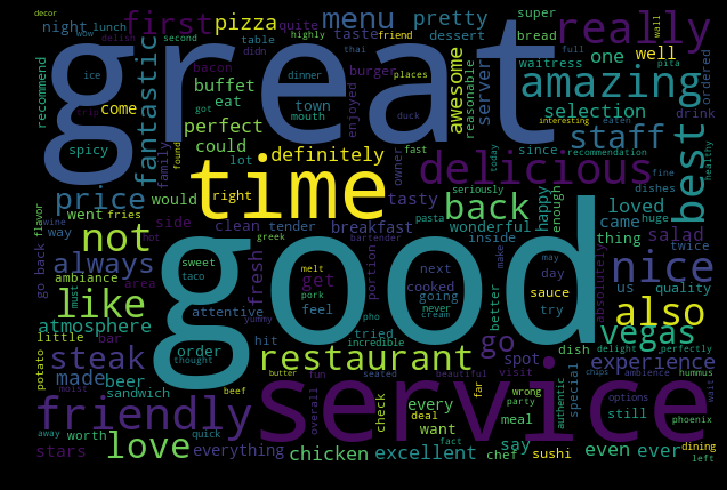

In [15]:
generate_wordcloud(positive_words)

We shall repeat the same for negative words

In [16]:
negative_words = ''
for sentence in negativeReviews.Review:
    temptext = re.sub('[^a-zA-Z]', ' ', sentence)
    temptext = temptext.lower()
    tokens = nltk.word_tokenize(temptext)
    tokens = [word for word in tokens if word not in set(builtinstopwords)]
    
    for words in tokens:
        negative_words = negative_words + words + ' '
    #review = [ps.stem(word) for word in review if not word in set(builtinstopwords)]
    #review = [lm.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    #making it in a string from a set  with space
    #review = ' '.join(review
negative_words

'crust not good not tasty texture nasty getting angry want damn pho honeslty didn taste fresh potatoes like rubber could tell made ahead time kept warmer would not go back cashier no care ever say still ended wayyy overpriced disgusted pretty sure human hair shocked no signs indicate cash waitress little slow service not worth time let alone vegas not like burrittos blah never brought salad asked took hour get tables restaurant luke warm sever running around like totally overwhelmed worst salmon sashimi like final blow seems like good quick grab bite familiar pub favor look elsewhere poor service waiter made feel like stupid every time came table service sucks not deal good enough would drag establishment hard judge whether sides good grossed melted styrofoam didn want eat fear getting sick frozen pucks disgust worst people behind register bad damn generic horrible attitudes towards customers talk one customers don enjoy heart attack grill downtown vegas absolutely flat lined excuse re

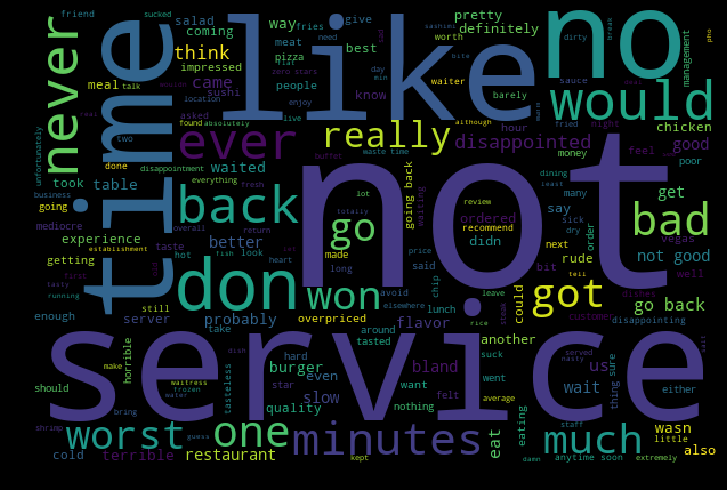

In [17]:
generate_wordcloud(negative_words)

These 2 word cloud looks fine. If you feel some words should be there you can put in the stopwords.

Now the same cleaning technique we can apply for the whole dataset

In [18]:
corpus = []
for i in range(0, len(dataset)):
    #sub removes punctuations numbers extraa
    #only include all the alphabets uppercas and lower case and 
    #also a space ' ' for each row in review column
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    #applying lowercase 
    review = review.lower()
    #SPLIT THE words into a list of words
    review = review.split()
    ps = PorterStemmer()
    #lm = WordNetLemmatizer()
    #use set() for faster optimization it is faster than a list
    #we take out words like "this that" etc which are found in stopwords from the review corpus
    #stemming This will remove the suffixes/prefixs like ing from the words and gives another word. 
    #review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = [ps.stem(word) for word in review if not word in set(builtinstopwords)]
    #review = [lm.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    #making it in a string from a set  with space
    review = ' '.join(review)
    corpus.append(review)


for i in range(0,len(corpus)):
    print (i,corpus[i])
    

0 wow love
1 crust not good
2 not tasti textur nasti
3 stop late may bank holiday rick steve recommend love
4 select menu great price
5 get angri want damn pho
6 honeslti didn tast fresh
7 potato like rubber could tell made ahead time kept warmer
8 fri great
9 great touch
10 servic prompt
11 would not go back
12 cashier no care ever say still end wayyy overpr
13 tri cape cod ravoli chicken cranberri mmmm
14 disgust pretti sure human hair
15 shock no sign indic cash
16 highli recommend
17 waitress littl slow servic
18 not worth time let alon vega
19 not like
20 burritto blah
21 amaz
22 servic also cute
23 could care less interior beauti
24 perform
25 right red velvet cake ohhh stuff good
26 never brought salad ask
27 hole wall great mexican street taco friendli staff
28 took hour get tabl restaur luke warm sever run around like total overwhelm
29 worst salmon sashimi
30 also combo like burger fri beer decent deal
31 like final blow
32 found accid could not happier
33 seem like good quic

In [21]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
#max features returns the n number of most common words
#so reduced to total words from 1766 to 1500
cv = CountVectorizer() #max_features = 1500
#generate a sparse matrix (bow)
X_cv = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values
X_cv.shape


(1000, 1581)

In [24]:
#convertint he X to a dataframe
X = pd.DataFrame(X_cv,columns=cv.get_feature_names())
X

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Now lets import Ml algorithms

In [26]:
from sklearn.linear_model import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


We will make a list of models that we will use

In [27]:
models = []
models.append(('Logistic Regression with l1 penalty', LogisticRegression(penalty='l1',random_state= 7)))
models.append(('Logistic Regression with l2 penalty', LogisticRegression(penalty='l2',random_state= 7,dual=False)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
models.append(('Random Forest with Entropy', RandomForestClassifier(n_estimators=500, criterion= "entropy", random_state= 7)))
models.append(('Random Forest with gini', RandomForestClassifier(n_estimators=500, criterion= "gini", random_state= 7)))
models.append(('DecisionTree with entropy', DecisionTreeClassifier(criterion= "entropy", random_state= 7)))
models.append(('DecisionTree with gini', DecisionTreeClassifier(criterion= "gini", random_state= 7)))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Multinominal Naive Bayes', MultinomialNB()))
models.append(('Bernoulli Naive Bayes', BernoulliNB()))

In [28]:
from sklearn.metrics import * 

In [29]:
def adjustedR(Ytest,ypredict,n,p):
    """ Function to calcualte adjusted R"""
    r2 = r2_score(Ytest,ypredict)
    adjustedr2 = 1-((1-r2)*((n-1)/(n-p-1)))
    #where n is number of observations in sample and p is number of independent variables in model
    return (adjustedr2)

In [30]:
def ROCcurve(fpr, tpr,name):
    """ Function to generate ROC Curve"""
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic\n%s'%name)
    plt.legend(loc="lower right")
    #plt.savefig('somename.png'%name, format='png')
    return (plt.show())

In [31]:
#function to run the models for the datasets
def allmodels(X_train, Y_train,X_test,Y_test,X):
    """
    this generates roc cure for each model and a dataframe of measurements of all the models
    
    """
    model_list = pd.DataFrame(columns=("Model","Accuracy","F1Score","AUC","Diff of Adj R and R"))
    rownumber = 0
    for name, model in models:
        classifier = model
        classifier.fit(X_train, Y_train)
        # prediction
        Y_predict = classifier.predict(X_test)
        fpr, tpr, thresholds = roc_curve(Y_test, Y_predict, pos_label=1)
        #print (name)
        ROCcurve(fpr, tpr,name)
        r2 = abs(r2_score(Y_test,Y_predict))
        adjustedr = abs(adjustedR(Y_test,Y_predict,len(X),len(X.columns)))
        model_list.loc[rownumber,"Model"]= name
        model_list.loc[rownumber,"Accuracy"] = round(((accuracy_score(Y_test,Y_predict))*100))
        model_list.loc[rownumber,"F1Score"]= round((f1_score(Y_test,Y_predict)),2)
        model_list.loc[rownumber,"AUC"]= round((roc_auc_score(Y_test,Y_predict)),2)
        model_list.loc[rownumber,"Diff of Adj R and R"] = round ((adjustedr-r2),3)
        #print (confusion_matrix(Y_test,Y_predict))
        rownumber += 1
    model_list.sort_values(by="AUC",ascending=False)
    return (model_list.sort_values(by="AUC",ascending=False))


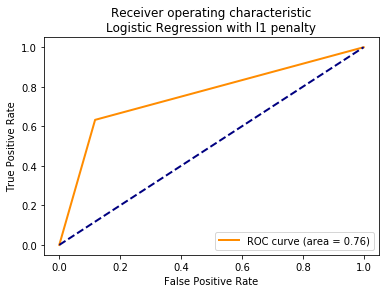

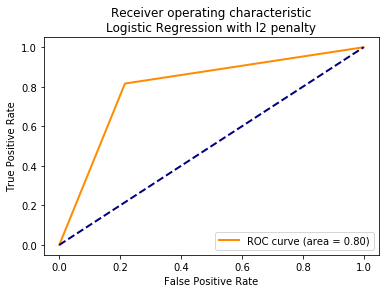

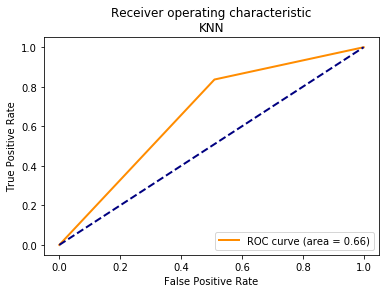

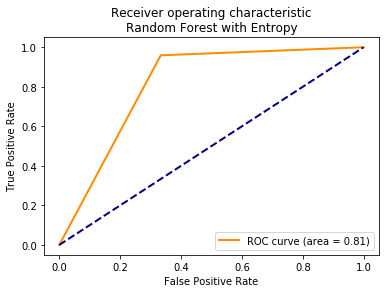

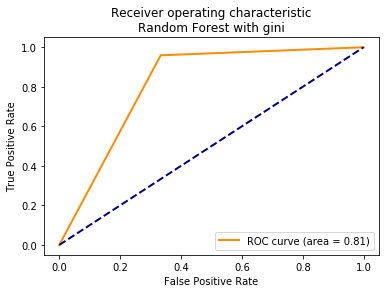

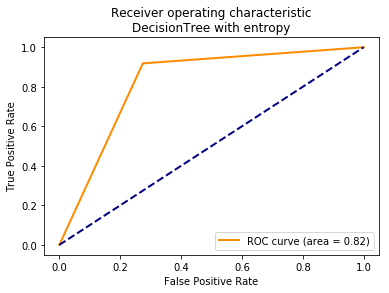

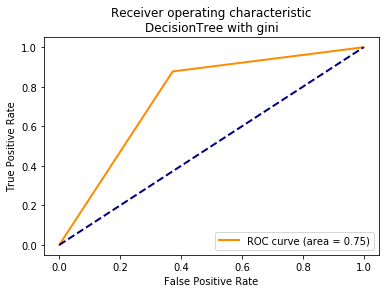

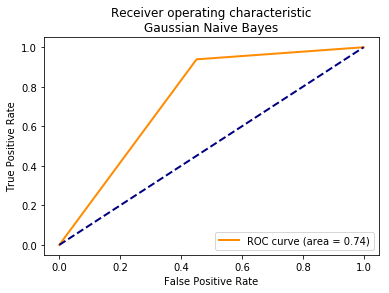

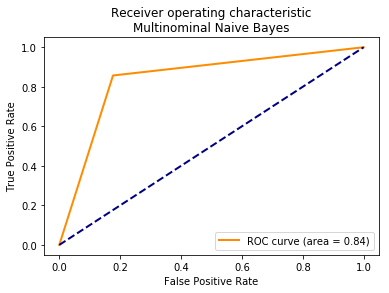

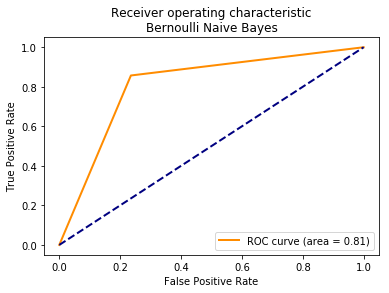

,Model,Accuracy,F1Score,AUC,Diff of Adj R and R
8,Multinominal Naive Bayes,84,0.84,0.84,1.739
5,DecisionTree with entropy,82,0.83,0.82,1.957
3,Random Forest with Entropy,81,0.83,0.81,2.065
4,Random Forest with gini,81,0.83,0.81,2.065
9,Bernoulli Naive Bayes,81,0.82,0.81,2.065
1,Logistic Regression with l2 penalty,80,0.8,0.8,2.174
0,Logistic Regression with l1 penalty,76,0.72,0.76,2.609
6,DecisionTree with gini,75,0.77,0.75,2.717
7,Gaussian Naive Bayes,74,0.78,0.74,2.745
2,KNN,66,0.71,0.66,2.975


In [32]:
allmodels(X_train, y_train, X_test, y_test,X)

From the output we can conclude that we could go for Multinominal Naive Bayes as it gives the highest accuracy and AUC